In [2]:
# Download the dataset

!git clone https://github.com/bochendong/few_shot_classification.git

Cloning into 'few_shot_classification'...
remote: Enumerating objects: 13216, done.
remote: Counting objects: 100% (64/64), done.
remote: Compressing objects: 100% (47/47), done.
remote: Total 13216 (delta 31), reused 47 (delta 17), pack-reused 13152 (from 1)
Receiving objects: 100% (13216/13216), 437.31 MiB | 17.22 MiB/s, done.
Resolving deltas: 100% (487/487), done.
Updating files: 100% (29045/29045), done.


In [3]:
import os
import torch
import torchvision.transforms as transforms
from torchvision.datasets import ImageFolder
from torchvision import models
from torch.utils.data import DataLoader
import torch.nn as nn
import torch.optim as optim
from tqdm.auto import tqdm
from matplotlib import pyplot as plt

In [4]:
# Data paths
train_dir = '/content/few_shot_classification/code/train'
val_dir = '/content/few_shot_classification/code/val'

# Data transformations (image preprocessing)
train_transforms = transforms.Compose([
    transforms.Resize((299, 299)),          # Resize the image
    transforms.ToTensor(),                  # Convert to tensor
    transforms.Normalize(mean=[0.5, 0.5, 0.5], std=[0.5, 0.5, 0.5])  # Normalize
])

val_transforms = transforms.Compose([
    transforms.Resize((299, 299)),          # Resize the image
    transforms.ToTensor(),                  # Convert to tensor
    transforms.Normalize(mean=[0.5, 0.5, 0.5], std=[0.5, 0.5, 0.5])  # Normalize
])

# Load data using ImageFolder
train_dataset = ImageFolder(root=train_dir, transform=train_transforms)
val_dataset = ImageFolder(root=val_dir, transform=val_transforms)

# Check classes
print(f"Class labels: {train_dataset.classes}")  # Print list of class names

# Create data loaders
batch_size = 32
num_epochs = 50
learning_rate = 0.001
num_classes = 150  # Number of classification classes
early_stopping_patience = 5  # Early stopping criteria (stop if no improvement for consecutive epochs)
train_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True, num_workers=2)
val_loader = DataLoader(val_dataset, batch_size=batch_size, shuffle=False, num_workers=2)

Class labels: ['Abra', 'Aerodactyl', 'Alakazam', 'Alolan Sandslash', 'Arbok', 'Arcanine', 'Articuno', 'Beedrill', 'Bellsprout', 'Blastoise', 'Bulbasaur', 'Butterfree', 'Caterpie', 'Chansey', 'Charizard', 'Charmander', 'Charmeleon', 'Clefable', 'Clefairy', 'Cloyster', 'Cubone', 'Dewgong', 'Diglett', 'Ditto', 'Dodrio', 'Doduo', 'Dragonair', 'Dragonite', 'Dratini', 'Drowzee', 'Dugtrio', 'Eevee', 'Ekans', 'Electabuzz', 'Electrode', 'Exeggcute', 'Exeggutor', 'Farfetchd', 'Fearow', 'Flareon', 'Gastly', 'Gengar', 'Geodude', 'Gloom', 'Golbat', 'Goldeen', 'Golduck', 'Golem', 'Graveler', 'Grimer', 'Growlithe', 'Gyarados', 'Haunter', 'Hitmonchan', 'Hitmonlee', 'Horsea', 'Hypno', 'Ivysaur', 'Jigglypuff', 'Jolteon', 'Jynx', 'Kabuto', 'Kabutops', 'Kadabra', 'Kakuna', 'Kangaskhan', 'Kingler', 'Koffing', 'Krabby', 'Lapras', 'Lickitung', 'Machamp', 'Machoke', 'Machop', 'Magikarp', 'Magmar', 'Magnemite', 'Magneton', 'Mankey', 'Marowak', 'Meowth', 'Metapod', 'Mew', 'Mewtwo', 'Moltres', 'MrMime', 'Muk', '

In [ ]:
# Number of output classes
num_classes = 150  # Set the number of classes in your dataset

# Learning rate for the optimizer
learning_rate = 0.001  # Define the learning rate for model training

# Load the pretrained Inception v3 model
# Inception v3 is a pre-trained deep learning model designed for classification tasks (e.g., ImageNet)
model = models.inception_v3(pretrained=False)  # Use pretrained weights from ImageNet

# Modify the fully connected (fc) layer to match the number of classes in the custom dataset
# The original fc layer is designed for ImageNet's 1,000 classes, so we replace it
model.fc = nn.Linear(model.fc.in_features, num_classes)  # Update the final layer to output 150 classes

# Disable auxiliary logits
# Inception v3 uses an auxiliary classifier to improve training; setting `aux_logits = False` disables it
model.aux_logits = False  # This ensures only the main logits are computed for simplicity

# Set up the device
# Use GPU (cuda:0) if available; otherwise, fallback to CPU
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")

# Move the model to the selected device (GPU or CPU)
model = model.to(device)

# Define the loss function
# CrossEntropyLoss is a standard loss function for multi-class classification tasks
criterion = nn.CrossEntropyLoss()

# Define the optimizer
# Adam optimizer is used to adjust the model parameters during training
optimizer = optim.Adam(model.parameters(), lr=learning_rate)

# Print the model structure
# This outputs the architecture of the modified Inception v3 model
print(model)

/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=Inception_V3_Weights.IMAGENET1K_V1`. You can also use `weights=Inception_V3_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)


Inception3(
  (Conv2d_1a_3x3): BasicConv2d(
    (conv): Conv2d(3, 32, kernel_size=(3, 3), stride=(2, 2), bias=False)
    (bn): BatchNorm2d(32, eps=0.001, momentum=0.1, affine=True, track_running_stats=True)
  )
  (Conv2d_2a_3x3): BasicConv2d(
    (conv): Conv2d(32, 32, kernel_size=(3, 3), stride=(1, 1), bias=False)
    (bn): BatchNorm2d(32, eps=0.001, momentum=0.1, affine=True, track_running_stats=True)
  )
  (Conv2d_2b_3x3): BasicConv2d(
    (conv): Conv2d(32, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
    (bn): BatchNorm2d(64, eps=0.001, momentum=0.1, affine=True, track_running_stats=True)
  )
  (maxpool1): MaxPool2d(kernel_size=3, stride=2, padding=0, dilation=1, ceil_mode=False)
  (Conv2d_3b_1x1): BasicConv2d(
    (conv): Conv2d(64, 80, kernel_size=(1, 1), stride=(1, 1), bias=False)
    (bn): BatchNorm2d(80, eps=0.001, momentum=0.1, affine=True, track_running_stats=True)
  )
  (Conv2d_4a_3x3): BasicConv2d(
    (conv): Conv2d(80, 192, kernel_size=(3, 3), stri

In [10]:
# Training function
def train_model(model, train_loader, val_loader, criterion, optimizer, num_epochs, patience):
    train_acc_history = []
    val_acc_history = []
    train_loss_history = []
    val_loss_history = []
    best_acc = 0.0
    patience_counter = 0  # Early stopping counter

    for epoch in range(num_epochs):
        print(f"Epoch {epoch + 1}/{num_epochs}")
        print("-" * 10)

        for phase in ["train", "val"]:
            if phase == "train":
                model.train()
                dataloader = train_loader
            else:
                model.eval()
                dataloader = val_loader

            running_loss = 0.0
            running_corrects = 0

            for inputs, labels in dataloader:
                inputs, labels = inputs.to(device), labels.to(device)
                optimizer.zero_grad()

                with torch.set_grad_enabled(phase == "train"):
                    outputs = model(inputs)
                    _, preds = torch.max(outputs, 1)
                    loss = criterion(outputs, labels)

                    if phase == "train":
                        loss.backward()
                        optimizer.step()

                running_loss += loss.item() * inputs.size(0)
                running_corrects += torch.sum(preds == labels.data)

            epoch_loss = running_loss / len(dataloader.dataset)
            epoch_acc = running_corrects.double() / len(dataloader.dataset)

            print(f"{phase} Loss: {epoch_loss:.4f} Acc: {epoch_acc:.4f}")

            if phase == "train":
                train_acc_history.append(epoch_acc.item())
                train_loss_history.append(epoch_loss)
            else:
                val_acc_history.append(epoch_acc.item())
                val_loss_history.append(epoch_loss)

                # Save the best model
                if epoch_acc > best_acc:
                    best_acc = epoch_acc
                    patience_counter = 0
                else:
                    patience_counter += 1

        # Check early stopping condition
        if patience_counter >= patience:
            print("Early stopping triggered!")
            break

    print("Training complete")
    print(f"Best val Acc: {best_acc:.4f}")
    return model, train_acc_history, val_acc_history, train_loss_history, val_loss_history

# Accuracy and loss visualization
def plot_accuracy_and_loss(train_acc, val_acc, train_loss, val_loss):
    # Visualize accuracy
    plt.figure(figsize=(12, 6))
    plt.subplot(1, 2, 1)
    plt.plot(train_acc, label="Train Accuracy")
    plt.plot(val_acc, label="Validation Accuracy")
    plt.xlabel("Epochs")
    plt.ylabel("Accuracy")
    plt.title("Training and Validation Accuracy")
    plt.legend()
    plt.grid(True)

    # Visualize loss
    plt.subplot(1, 2, 2)
    plt.plot(train_loss, label="Train Loss")
    plt.plot(val_loss, label="Validation Loss")
    plt.xlabel("Epochs")
    plt.ylabel("Loss")
    plt.title("Training and Validation Loss")
    plt.legend()
    plt.grid(True)

    plt.tight_layout()
    plt.show()

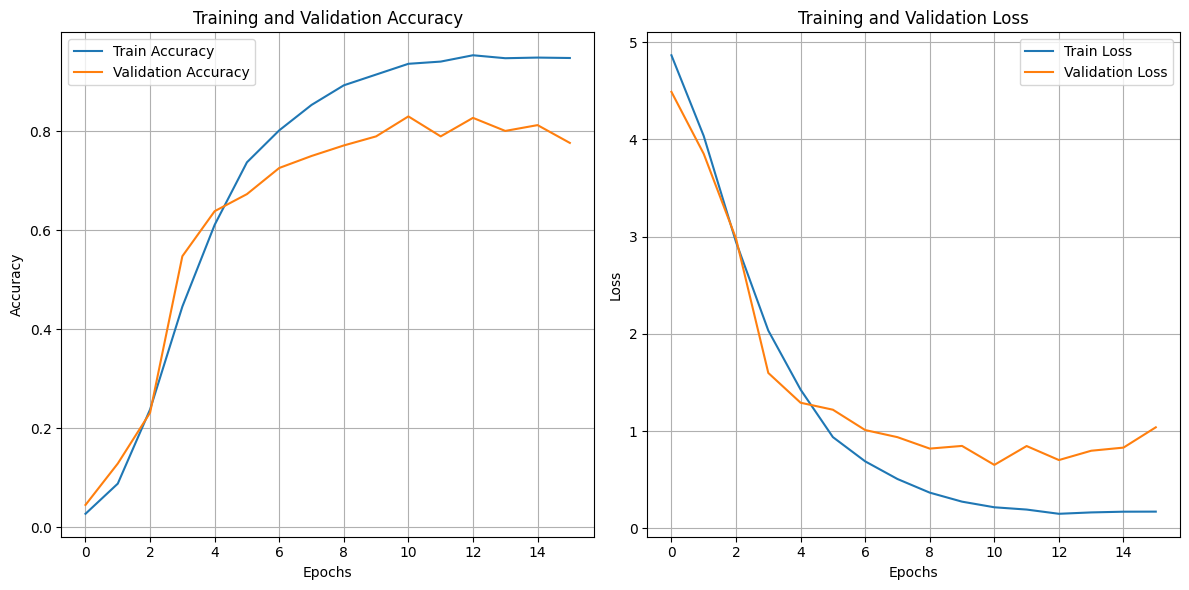

In [ ]:
# Start training
trained_model, train_acc, val_acc, train_loss, val_loss = train_model(
    model, train_loader, val_loader, criterion, optimizer, num_epochs, early_stopping_patience
)

# Display accuracy and loss graphs
plot_accuracy_and_loss(train_acc, val_acc, train_loss, val_loss)

In [5]:
# Number of output classes
num_classes = 150  # Set the number of classes in your dataset

# Learning rate for the optimizer
learning_rate = 0.001  # Define the learning rate for model training

# Load the pretrained Inception v3 model
# Inception v3 is a pre-trained deep learning model designed for classification tasks (e.g., ImageNet)
model = models.inception_v3(pretrained=False)  # Use pretrained weights from ImageNet

# Modify the fully connected (fc) layer to match the number of classes in the custom dataset
# The original fc layer is designed for ImageNet's 1,000 classes, so we replace it
model.fc = nn.Linear(model.fc.in_features, num_classes)  # Update the final layer to output 150 classes

# Disable auxiliary logits
# Inception v3 uses an auxiliary classifier to improve training; setting `aux_logits = False` disables it
model.aux_logits = False  # This ensures only the main logits are computed for simplicity

# Set up the device
# Use GPU (cuda:0) if available; otherwise, fallback to CPU
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")

# Move the model to the selected device (GPU or CPU)
model = model.to(device)

# Define the loss function
# CrossEntropyLoss is a standard loss function for multi-class classification tasks
criterion = nn.CrossEntropyLoss()

# Define the optimizer
# Adam optimizer is used to adjust the model parameters during training
optimizer = optim.Adam(model.parameters(), lr=learning_rate)

# Print the model structure
# This outputs the architecture of the modified Inception v3 model
print(model)

/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=None`.
  warnings.warn(msg)
/usr/local/lib/python3.10/dist-packages/torchvision/models/inception.py:43: FutureWarning: The default weight initialization of inception_v3 will be changed in future releases of torchvision. If you wish to keep the old behavior (which leads to long initialization times due to scipy/scipy#11299), please set init_weights=True.
  warnings.warn(


Inception3(
  (Conv2d_1a_3x3): BasicConv2d(
    (conv): Conv2d(3, 32, kernel_size=(3, 3), stride=(2, 2), bias=False)
    (bn): BatchNorm2d(32, eps=0.001, momentum=0.1, affine=True, track_running_stats=True)
  )
  (Conv2d_2a_3x3): BasicConv2d(
    (conv): Conv2d(32, 32, kernel_size=(3, 3), stride=(1, 1), bias=False)
    (bn): BatchNorm2d(32, eps=0.001, momentum=0.1, affine=True, track_running_stats=True)
  )
  (Conv2d_2b_3x3): BasicConv2d(
    (conv): Conv2d(32, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
    (bn): BatchNorm2d(64, eps=0.001, momentum=0.1, affine=True, track_running_stats=True)
  )
  (maxpool1): MaxPool2d(kernel_size=3, stride=2, padding=0, dilation=1, ceil_mode=False)
  (Conv2d_3b_1x1): BasicConv2d(
    (conv): Conv2d(64, 80, kernel_size=(1, 1), stride=(1, 1), bias=False)
    (bn): BatchNorm2d(80, eps=0.001, momentum=0.1, affine=True, track_running_stats=True)
  )
  (Conv2d_4a_3x3): BasicConv2d(
    (conv): Conv2d(80, 192, kernel_size=(3, 3), stri

In [11]:
# Start training
trained_model, train_acc, val_acc, train_loss, val_loss = train_model(
    model, train_loader, val_loader, criterion, optimizer, num_epochs, early_stopping_patience
)
plot_accuracy_and_loss(train_acc, val_acc, train_loss, val_loss)

Epoch 1/50
----------
train Loss: 4.7126 Acc: 0.0369
val Loss: 4.3547 Acc: 0.0748
Epoch 2/50
----------
train Loss: 3.7994 Acc: 0.0946
val Loss: 3.3407 Acc: 0.1511
Epoch 3/50
----------
train Loss: 3.3749 Acc: 0.1460
val Loss: 3.0638 Acc: 0.2186
Epoch 4/50
----------
train Loss: 3.0107 Acc: 0.2120
val Loss: 2.6831 Acc: 0.2861
Epoch 5/50
----------
train Loss: 2.6372 Acc: 0.2924
val Loss: 2.6592 Acc: 0.3008
Epoch 6/50
----------
train Loss: 2.3388 Acc: 0.3610
val Loss: 2.1541 Acc: 0.4160
Epoch 7/50
----------
train Loss: 2.0306 Acc: 0.4366
val Loss: 1.8733 Acc: 0.4960
Epoch 8/50
----------
train Loss: 1.7656 Acc: 0.5112
val Loss: 1.6944 Acc: 0.5415
Epoch 9/50
----------
train Loss: 1.4855 Acc: 0.5853
val Loss: 1.6939 Acc: 0.5525
Epoch 10/50
----------
train Loss: 1.3253 Acc: 0.6186
val Loss: 1.4461 Acc: 0.5935
Epoch 11/50
----------
train Loss: 1.1431 Acc: 0.6665
val Loss: 1.7060 Acc: 0.5583
Epoch 12/50
----------
train Loss: 1.0164 Acc: 0.7062
val Loss: 1.5333 Acc: 0.6031
Epoch 13/50
-

KeyboardInterrupt: 